<a href="https://colab.research.google.com/github/amaliahwang/MACHINE-LEARNING---ClassificationPandasStudentsMentalHealth/blob/main/Pandas_Students_Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df_MentalHealth = pd.read_csv('/content/drive/MyDrive/Semester 6/Metopen/Student Mental health.csv')
df_MentalHealth.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
df_MentalHealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [ ]:
df_MentalHealth.shape

(101, 11)

In [ ]:
df_MentalHealth.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [ ]:
df_MentalHealth.count()

Timestamp                                       101
Choose your gender                              101
Age                                             100
What is your course?                            101
Your current year of Study                      101
What is your CGPA?                              101
Marital status                                  101
Do you have Depression?                         101
Do you have Anxiety?                            101
Do you have Panic attack?                       101
Did you seek any specialist for a treatment?    101
dtype: int64

# **PRE-PROCESSING DATA**

In [ ]:
# Mengasumsikan dataframe Anda bernama df_Mental_Health
df_MentalHealth = df_MentalHealth.rename(columns={
    "What is your CGPA?": "IPK",
    "Choose your gender": "Gender",
    "What is your course?": "Major",
    "Your current year of Study": "Year",
    "Marital status": "Marriage",
    "Do you have Depression?": "Depression",
    "Do you have Anxiety?": "Anxiety",
    "Do you have Panic attack?": "Panic attack",
    "Did you seek any specialist for a treatment?": "Treatment"
})

In [ ]:
df_MentalHealth.head()

,Timestamp,Gender,Age,Major,Year,IPK,Marriage,Depression,Anxiety,Panic attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


**Label Encoder**

In [ ]:
# Binary Encoding for Yes/No Columns (label encoder)
binary_columns = ['Marriage','Depression', 'Anxiety', 'Panic attack', 'Treatment']
df_MentalHealth[binary_columns] = df_MentalHealth[binary_columns].replace({'Yes': 1, 'No': 0})

In [ ]:
# Standardize the 'year of Study' column values and convert to numeric
df_MentalHealth['Year'] = df_MentalHealth['Year'].str.lower().str.replace('year', '').str.strip().map({'1': 1, '2': 2, '3': 3, '4': 4})

# Check the unique values in the 'year of Study' column after conversion
print(df_MentalHealth['Year'].unique())

[1 2 3 4]


In [ ]:
df_MentalHealth['Gender'] = df_MentalHealth['Gender'].map({'Female': 0, 'Male': 1})

In [ ]:
Major_mapping = {
    'engineering': 'Engineering',
    'islamic education': 'Islamic Education',
    'bit': 'BIT',
    'laws': 'Law',
    'mathemathics': 'Mathematics',
    'pendidikan islam': 'Islamic Education',
    'bcs': 'BCS',
    'human resources': 'Human Resources',
    'irkhs': 'IRKHS',
    'psychology': 'Psychology',
    'kenms': 'KENMS',
    'accounting': 'Accounting',
    'enm': 'ENM',
    'marine science': 'Marine Science',
    'koe': 'KOE',
    'banking studies': 'Banking Studies',
    'business administration': 'Business Administration',
    'kirkhs': 'KIRKHS',
    'usuluddin': 'Usuluddin',
    'taasl': 'TAASL',
    'engine': 'Engineering',
    'ala': 'ALA',
    'biomedical science': 'Biomedical Science',
    'benl': 'BENL',
    'it': 'IT',
    'cts': 'CTS',
    'econs': 'Economics',
    'mhsc': 'MHSC',
    'malcom': 'MALCOM',
    'kop': 'KOP',
    'human sciences': 'Human Sciences',
    'biotechnology': 'Biotechnology',
    'communication': 'Communication',
    'diploma nursing': 'Diploma Nursing',
    'pendidikan islam': 'Islamic Education',
    'radiography': 'Radiography',
    'fiqh fatwa': 'Fiqh Fatwa',
    'diploma tesl': 'Diploma TESL',
    'fiqh': 'Fiqh',
    'nursing': 'Nursing',
}
#since multiple entries of the same courses exist
#yet only differ in lettercase
df_MentalHealth['Major'] = df_MentalHealth['Major'].str.lower().str.strip().map(Major_mapping)
df_MentalHealth.Major.unique()

array(['Engineering', 'Islamic Education', 'BIT', 'Law', 'Mathematics',
       'BCS', 'Human Resources', 'IRKHS', 'Psychology', 'KENMS',
       'Accounting', 'ENM', 'Marine Science', 'KOE', 'Banking Studies',
       'Business Administration', nan, 'KIRKHS', 'Usuluddin', 'TAASL',
       'ALA', 'Biomedical Science', 'BENL', 'IT', 'CTS', 'Economics',
       'MHSC', 'MALCOM', 'KOP', 'Human Sciences', 'Biotechnology',
       'Communication', 'Diploma Nursing', 'Radiography', 'Fiqh Fatwa',
       'Diploma TESL', 'Fiqh', 'Nursing'], dtype=object)

In [ ]:
df_MentalHealth['Major'].value_counts()

Major
Engineering                19
BCS                        18
BIT                        10
KOE                         6
Islamic Education           5
Biomedical Science          4
BENL                        3
Psychology                  3
Law                         2
KIRKHS                      2
Human Sciences              1
MHSC                        1
MALCOM                      1
KOP                         1
Communication               1
Biotechnology               1
CTS                         1
Diploma Nursing             1
Radiography                 1
Fiqh Fatwa                  1
Diploma TESL                1
Fiqh                        1
Economics                   1
TAASL                       1
IT                          1
ALA                         1
Usuluddin                   1
Business Administration     1
Banking Studies             1
Marine Science              1
ENM                         1
Accounting                  1
KENMS                       1
IRKH

In [ ]:
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()
df_MentalHealth['Major'] = le.fit_transform(df_MentalHealth['Major'])
# The Major dataset skiped over the '42th entry', so can't use df['Major'] = pd.DataFrame(le.f

In [ ]:
 #Remove leading and trailing whitespaces in the 'CGPA' column
df_MentalHealth['IPK'] = df_MentalHealth['IPK'].str.strip()

In [ ]:
def convert_ipk_range(ipk_range):
    # Split the range into two values
    ipk_values = ipk_range.split('-')
    # Calculate the midpoint
    midpoint = (float(ipk_values[0]) + float(ipk_values[1])) / 2
    return midpoint

In [ ]:
# Apply the function to the 'CGPA' column
df_MentalHealth['IPK'] = df_MentalHealth['IPK'].apply(convert_ipk_range)

# Check the unique values in the 'CGPA' column after conversion
print(df_MentalHealth['IPK'].unique())

[3.245 3.75  2.745 2.245 0.995]


In [ ]:
df_MentalHealth.head()

,Timestamp,Gender,Age,Major,Year,IPK,Marriage,Depression,Anxiety,Panic attack,Treatment
0,8/7/2020 12:02,0,18.0,15,1,3.245,0,1,0,1,0
1,8/7/2020 12:04,1,21.0,22,2,3.245,0,0,1,0,0
2,8/7/2020 12:05,1,19.0,4,1,3.245,0,1,1,1,0
3,8/7/2020 12:06,0,22.0,27,3,3.245,1,1,0,0,0
4,8/7/2020 12:13,1,23.0,31,4,3.245,0,0,0,0,0


**Missing Values**

In [ ]:
# Check for missing values
print(df_MentalHealth.isnull().sum())

Timestamp       0
Gender          0
Age             1
Major           0
Year            0
IPK             0
Marriage        0
Depression      0
Anxiety         0
Panic attack    0
Treatment       0
dtype: int64


In [ ]:
#kolom Age, kita isikan dengan nilai rata - rata dari data yang lain
# Langkah 1: hitung rata-rata dari fitur Age
x = df_MentalHealth['Age'].mean()
# Langkah 2: replace/isikan data mean ke field yang kosong
df_MentalHealth['Age'] = df_MentalHealth['Age'].fillna(x)# fillna fitur pandas untuk mengisi ke kolom kosong
# Langkah 3
print('Jumlah data null pada kolom Age : ', df_MentalHealth['Age'].isna().sum())

Jumlah data null pada kolom Age :  0


In [ ]:
#Checking
print(df_MentalHealth.isnull().sum())
print("\n shape: ")
print(df_MentalHealth.shape)

Timestamp       0
Gender          0
Age             0
Major           0
Year            0
IPK             0
Marriage        0
Depression      0
Anxiety         0
Panic attack    0
Treatment       0
dtype: int64

 shape: 
(101, 11)


In [ ]:
# Menghitung jumlah baris duplikat
num_duplicates = len(df_MentalHealth) - len(df_MentalHealth.drop_duplicates())

# Menampilkan hasil
print("Jumlah baris duplikat:", num_duplicates)

Jumlah baris duplikat: 0


In [ ]:
df_MentalHealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     101 non-null    object 
 1   Gender        101 non-null    int64  
 2   Age           101 non-null    float64
 3   Major         101 non-null    int64  
 4   Year          101 non-null    int64  
 5   IPK           101 non-null    float64
 6   Marriage      101 non-null    int64  
 7   Depression    101 non-null    int64  
 8   Anxiety       101 non-null    int64  
 9   Panic attack  101 non-null    int64  
 10  Treatment     101 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 8.8+ KB


In [ ]:
df_MentalHealth= df_MentalHealth.drop(['Timestamp'], axis=1)
df_MentalHealth.head()

,Gender,Age,Major,Year,IPK,Marriage,Depression,Anxiety,Panic attack,Treatment
0,0,18.0,15,1,3.245,0,1,0,1,0
1,1,21.0,22,2,3.245,0,0,1,0,0
2,1,19.0,4,1,3.245,0,1,1,1,0
3,0,22.0,27,3,3.245,1,1,0,0,0
4,1,23.0,31,4,3.245,0,0,0,0,0


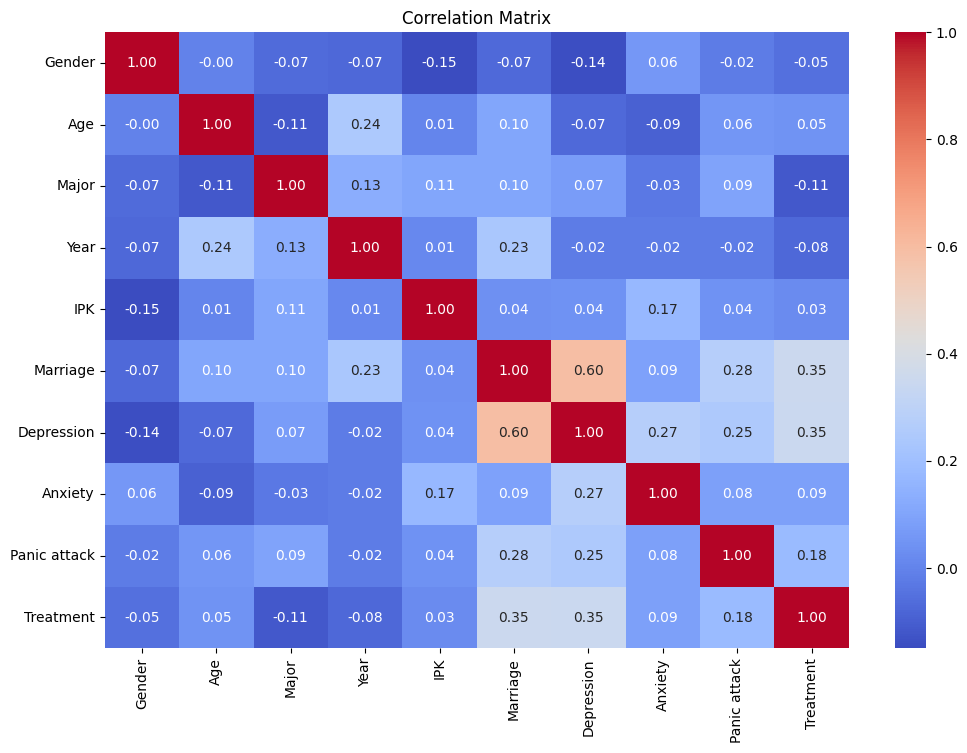

In [ ]:
correlation_matrix = df_MentalHealth.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='0.2f')
plt.title('Correlation Matrix')
plt.show()

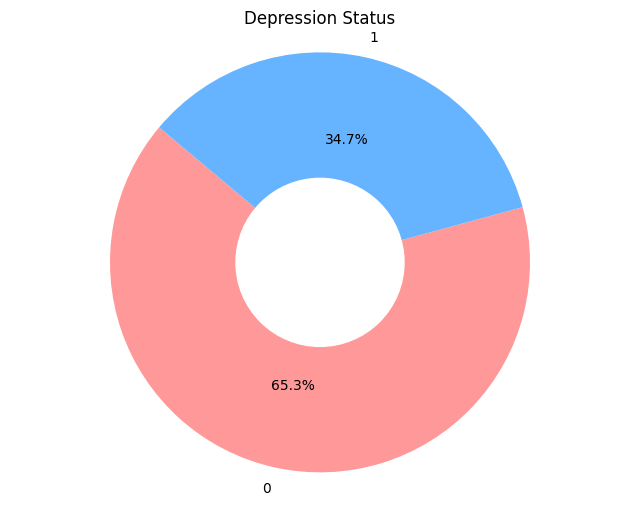

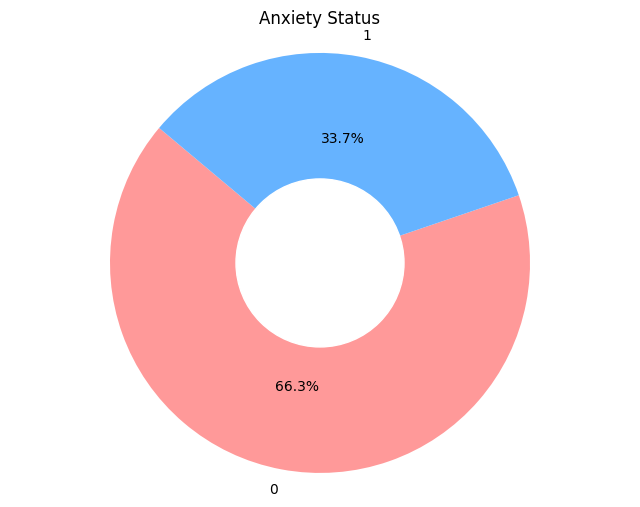

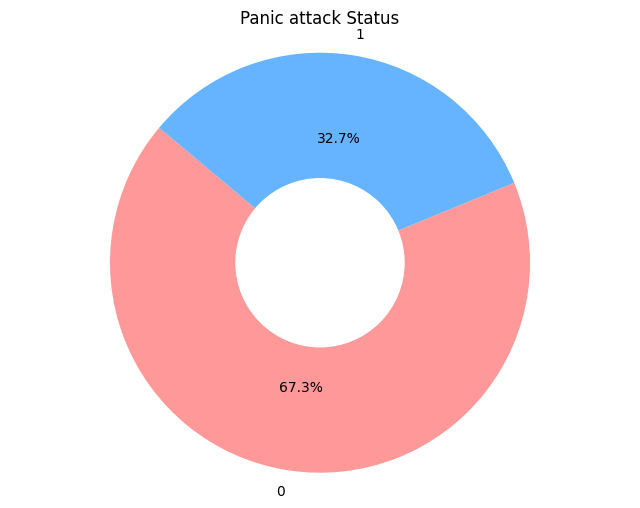

In [ ]:
import matplotlib.pyplot as plt

# Misalkan MentalHealth adalah DataFrame Pandas
# MentalHealth = pd.read_csv('path_to_your_file.csv')

# Daftar kolom-kolom yang ingin dibuatkan pie chart
columns_of_interest = ['Depression', 'Anxiety', 'Panic attack']

for column in columns_of_interest:
    # Menghitung jumlah setiap nilai pada kolom yang sedang diproses
    value_counts = df_MentalHealth[column].value_counts()

    # Ekstrak nilai dan jumlah kemunculan
    labels = value_counts.index.tolist()
    sizes = value_counts.values.tolist()

    # Warna untuk setiap bagian dari pie chart
    colors = ['#ff9999', '#66b3ff', '#99ff99']

    # Plot pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Tambahkan lingkaran putih di tengah pie chart
    my_circle = plt.Circle((0, 0), 0.4, color='white')
    plt.gcf().gca().add_artist(my_circle)

    # Tambahkan judul
    plt.title(f'{column} Status')

    # Tampilkan pie chart
    plt.show()


# **SPLIT DATA**

In [ ]:
target_columns = ['Depression', 'Anxiety', 'Panic attack']
X = df_MentalHealth.drop(columns=target_columns)  # Menggunakan parameter 'columns' untuk drop beberapa kolom
y = df_MentalHealth[target_columns]

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [ ]:
print("Total X Training : ", X_train.shape)
print("Total X Testing : ", X_test.shape)
print("Total Y Testing : ", y_test.shape)

Total X Training :  (80, 7)
Total X Testing :  (21, 7)
Total Y Testing :  (21, 3)


##**Random Forest**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming df_MentalHealth is already defined and loaded

# Define target and features
target_column = 'Depression'
X = df_MentalHealth.drop(columns=[target_column], errors='ignore')
y = df_MentalHealth[target_column].values.ravel()

total_accuracy = 0.0


for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

    # Membuat objek Random Forest Classifier
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    # Memprediksi respons untuk dataset uji
    y_pred = clf.predict(X_test)

    # Calculate accuracy for this iteration
    accuracy = accuracy_score(y_test, y_pred)

    # Model Accuracy, how often is the classifier correct?
    print("Akurasi pada percobaan ke-{0}: {1}".format(i+1, accuracy))

    # Add accuracy to total
    total_accuracy += accuracy

# Calculate average accuracy
avg_accuracy = total_accuracy / 30
avg_accuracy_percentage = avg_accuracy * 100  # Convert to percentage

print("Rata-rata akurasi Algoritma Random Forest Classifier dari 30 percobaan adalah: {:.2f}%".format(avg_accuracy_percentage))


Akurasi pada percobaan ke-1: 0.8095238095238095
Akurasi pada percobaan ke-2: 0.8571428571428571
Akurasi pada percobaan ke-3: 0.7619047619047619
Akurasi pada percobaan ke-4: 0.7619047619047619
Akurasi pada percobaan ke-5: 0.7619047619047619
Akurasi pada percobaan ke-6: 0.7619047619047619
Akurasi pada percobaan ke-7: 0.7619047619047619
Akurasi pada percobaan ke-8: 0.7619047619047619
Akurasi pada percobaan ke-9: 0.7619047619047619
Akurasi pada percobaan ke-10: 0.7619047619047619
Akurasi pada percobaan ke-11: 0.7619047619047619
Akurasi pada percobaan ke-12: 0.7619047619047619
Akurasi pada percobaan ke-13: 0.8095238095238095
Akurasi pada percobaan ke-14: 0.7619047619047619
Akurasi pada percobaan ke-15: 0.7619047619047619
Akurasi pada percobaan ke-16: 0.8095238095238095
Akurasi pada percobaan ke-17: 0.7619047619047619
Akurasi pada percobaan ke-18: 0.8095238095238095
Akurasi pada percobaan ke-19: 0.8095238095238095
Akurasi pada percobaan ke-20: 0.8571428571428571
Akurasi pada percobaan ke-21:

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming df_MentalHealth is already defined and loaded

# Define target and features
target_column = 'Anxiety'
X = df_MentalHealth.drop(columns=[target_column], errors='ignore')
y = df_MentalHealth[target_column].values.ravel()

## Split dataset menjadi train dan test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

total_accuracy = 0.0

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

    # Membuat objek Random Forest Classifier
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    # Memprediksi respons untuk dataset uji
    y_pred = clf.predict(X_test)

    # Calculate accuracy for this iteration
    accuracy = accuracy_score(y_test, y_pred)

    # Model Accuracy, how often is the classifier correct?
    print("Akurasi pada percobaan ke-{0}: {1}".format(i+1, accuracy))

    # Add accuracy to total
    total_accuracy += accuracy

# Calculate average accuracy
avg_accuracy = total_accuracy / 30
avg_accuracy_percentage = avg_accuracy * 100  # Convert to percentage

print("Rata-rata akurasi Algoritma Random Forest Classifier dari 30 percobaan adalah: {:.2f}%".format(avg_accuracy_percentage))


Akurasi pada percobaan ke-1: 0.38095238095238093
Akurasi pada percobaan ke-2: 0.47619047619047616
Akurasi pada percobaan ke-3: 0.47619047619047616
Akurasi pada percobaan ke-4: 0.42857142857142855
Akurasi pada percobaan ke-5: 0.42857142857142855
Akurasi pada percobaan ke-6: 0.42857142857142855
Akurasi pada percobaan ke-7: 0.42857142857142855
Akurasi pada percobaan ke-8: 0.42857142857142855
Akurasi pada percobaan ke-9: 0.42857142857142855
Akurasi pada percobaan ke-10: 0.42857142857142855
Akurasi pada percobaan ke-11: 0.42857142857142855
Akurasi pada percobaan ke-12: 0.47619047619047616
Akurasi pada percobaan ke-13: 0.42857142857142855
Akurasi pada percobaan ke-14: 0.42857142857142855
Akurasi pada percobaan ke-15: 0.47619047619047616
Akurasi pada percobaan ke-16: 0.42857142857142855
Akurasi pada percobaan ke-17: 0.42857142857142855
Akurasi pada percobaan ke-18: 0.38095238095238093
Akurasi pada percobaan ke-19: 0.5238095238095238
Akurasi pada percobaan ke-20: 0.42857142857142855
Akurasi pa

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming df_MentalHealth is already defined and loaded

# Define target and features
target_column = 'Panic attack'
X = df_MentalHealth.drop(columns=[target_column], errors='ignore')
y = df_MentalHealth[target_column].values.ravel()

## Split dataset menjadi train dan test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

total_accuracy = 0.0

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

    # Membuat objek Random Forest Classifier
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    # Memprediksi respons untuk dataset uji
    y_pred = clf.predict(X_test)

    # Calculate accuracy for this iteration
    accuracy = accuracy_score(y_test, y_pred)

    # Model Accuracy, how often is the classifier correct?
    print("Akurasi pada percobaan ke-{0}: {1}".format(i+1, accuracy))

    # Add accuracy to total
    total_accuracy += accuracy

# Calculate average accuracy
avg_accuracy = total_accuracy / 30
avg_accuracy_percentage = avg_accuracy * 100  # Convert to percentage

print("Rata-rata akurasi Algoritma Random Forest Classifier dari 30 percobaan adalah: {:.2f}%".format(avg_accuracy_percentage))


Akurasi pada percobaan ke-1: 0.7142857142857143
Akurasi pada percobaan ke-2: 0.6666666666666666
Akurasi pada percobaan ke-3: 0.5714285714285714
Akurasi pada percobaan ke-4: 0.6190476190476191
Akurasi pada percobaan ke-5: 0.6190476190476191
Akurasi pada percobaan ke-6: 0.5714285714285714
Akurasi pada percobaan ke-7: 0.5238095238095238
Akurasi pada percobaan ke-8: 0.6190476190476191
Akurasi pada percobaan ke-9: 0.5714285714285714
Akurasi pada percobaan ke-10: 0.5238095238095238
Akurasi pada percobaan ke-11: 0.6666666666666666
Akurasi pada percobaan ke-12: 0.6190476190476191
Akurasi pada percobaan ke-13: 0.5714285714285714
Akurasi pada percobaan ke-14: 0.6666666666666666
Akurasi pada percobaan ke-15: 0.6190476190476191
Akurasi pada percobaan ke-16: 0.6190476190476191
Akurasi pada percobaan ke-17: 0.6190476190476191
Akurasi pada percobaan ke-18: 0.6190476190476191
Akurasi pada percobaan ke-19: 0.6666666666666666
Akurasi pada percobaan ke-20: 0.6190476190476191
Akurasi pada percobaan ke-21:

##**Tuning & Kfold**

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fold 1 - Best parameters from GridSearchCV: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Fold 1 - Accuracy: 85.71%
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fold 2 - Best parameters from GridSearchCV: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Fold 2 - Accuracy: 75.00%
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fold 3 - Best parameters from GridSearchCV: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Fold 3 - Accuracy: 75.00%
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fold 4 - Best parameters from GridSearchCV: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Fold 4 - Accuracy: 80.00%
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fold 5 - Best parameters from GridSearchCV: {'max_depth': 5, 'min_samples_leaf': 1, '

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy on the test set: 90.48%


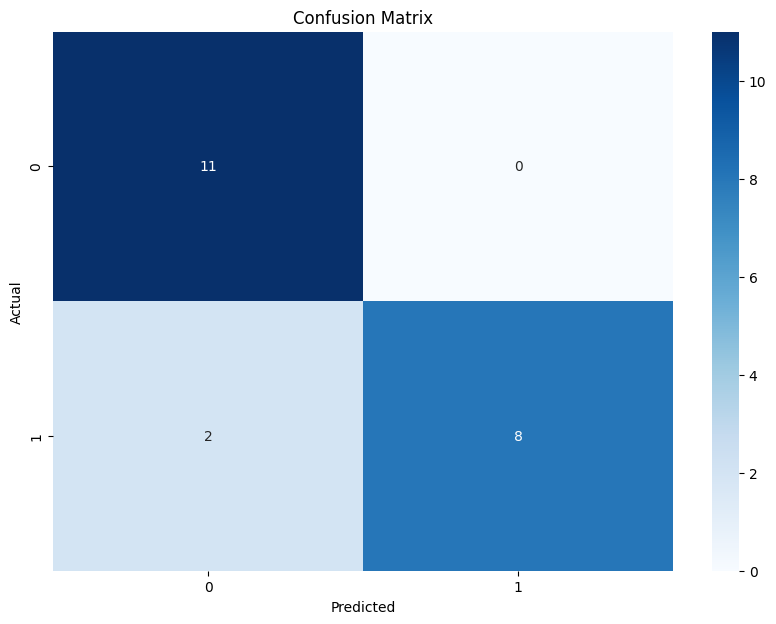

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.80      0.89        10

    accuracy                           0.90        21
   macro avg       0.92      0.90      0.90        21
weighted avg       0.92      0.90      0.90        21



In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, KFold
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_MentalHealth is already defined and loaded

# Define target and features
target_column = 'Depression'
X = df_MentalHealth.drop(columns=[target_column], errors='ignore')
y = df_MentalHealth[target_column].values.ravel()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 25)
# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=25)

# Fine-tuned parameter grid for grid search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5,7],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# List to store accuracy for each fold
accuracies = []

# Convert X and y to numpy arrays if they are not already
X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X
y_np = y

# KFold Cross Validation with GridSearchCV for each fold
fold = 1
for train_index, val_index in kf.split(X_np):
    X_train_kf, X_val_kf = X_np[train_index], X_np[val_index]
    y_train_kf, y_val_kf = y_np[train_index], y_np[val_index]

    # Create RandomForestClassifier object
    rf = RandomForestClassifier()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

    # Perform grid search on the current fold's training data
    grid_search.fit(X_train_kf, y_train_kf)

    # Get the best parameters for the current fold
    best_params = grid_search.best_params_
    print(f"Fold {fold} - Best parameters from GridSearchCV: {best_params}")

    # Create RandomForestClassifier with best parameters
    RF_clf = RandomForestClassifier(**best_params)

    # Train the classifier on the current fold's training data
    RF_clf.fit(X_train_kf, y_train_kf)

    # Predict the response for validation set
    y_pred_kf = RF_clf.predict(X_val_kf)

    # Calculate accuracy
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    accuracies.append(accuracy_kf * 100)

    print(f"Fold {fold} - Accuracy: {accuracy_kf * 100:.2f}%")
    fold += 1

# Calculate mean accuracy over all folds
mean_accuracy = np.mean(accuracies)
print("Average accuracy after KFold cross-validation: {:.2f}%".format(mean_accuracy))

# Final evaluation on the test set using the best hyperparameters found
# Re-fit the model using the entire training data with the best hyperparameters found in the last fold (for simplicity)
RF_clf.fit(X_np, y_np)
y_pred_test = RF_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test) * 100
print("Accuracy on the test set: {:.2f}%".format(test_accuracy))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Classification Report
class_report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(class_report)




Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fold 1 - Best parameters from GridSearchCV: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Fold 1 - Accuracy: 47.62%
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fold 2 - Best parameters from GridSearchCV: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Fold 2 - Accuracy: 45.00%
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fold 3 - Best parameters from GridSearchCV: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Fold 3 - Accuracy: 60.00%
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fold 4 - Best parameters from GridSearchCV: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Fold 4 - Accuracy: 75.00%
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fold 5 - Best parameters from GridSearchCV: {'max_depth': 5, 'min_samples_leaf': 1, '

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy on the test set: 85.71%


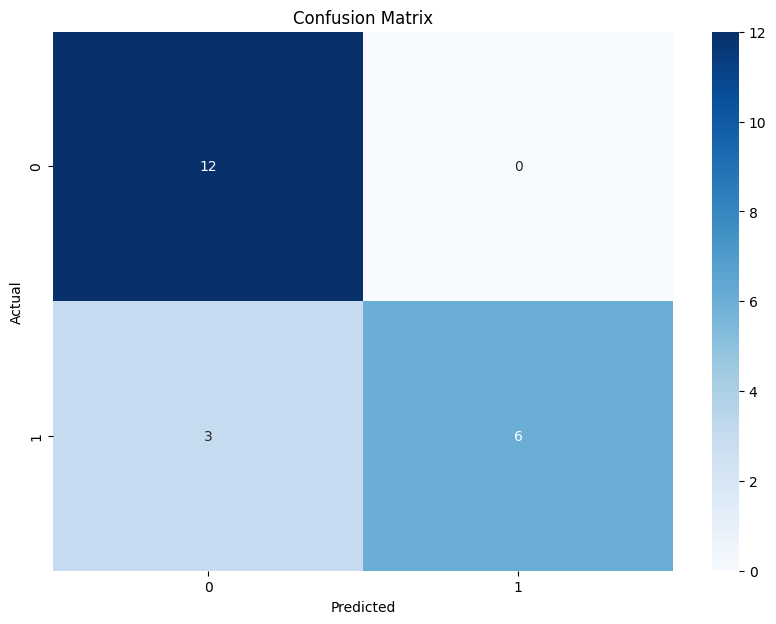

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.67      0.80         9

    accuracy                           0.86        21
   macro avg       0.90      0.83      0.84        21
weighted avg       0.89      0.86      0.85        21



In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, KFold
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_MentalHealth is already defined and loaded

# Define target and features
target_column = 'Anxiety'
X = df_MentalHealth.drop(columns=[target_column], errors='ignore')
y = df_MentalHealth[target_column].values.ravel()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 25)
# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=25)

# Fine-tuned parameter grid for grid search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5,7],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# List to store accuracy for each fold
accuracies = []

# Convert X and y to numpy arrays if they are not already
X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X
y_np = y

# KFold Cross Validation with GridSearchCV for each fold
fold = 1
for train_index, val_index in kf.split(X_np):
    X_train_kf, X_val_kf = X_np[train_index], X_np[val_index]
    y_train_kf, y_val_kf = y_np[train_index], y_np[val_index]

    # Create RandomForestClassifier object
    rf = RandomForestClassifier(random_state=21)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

    # Perform grid search on the current fold's training data
    grid_search.fit(X_train_kf, y_train_kf)

    # Get the best parameters for the current fold
    best_params = grid_search.best_params_
    print(f"Fold {fold} - Best parameters from GridSearchCV: {best_params}")

    # Create RandomForestClassifier with best parameters
    RF_clf = RandomForestClassifier(**best_params)

    # Train the classifier on the current fold's training data
    RF_clf.fit(X_train_kf, y_train_kf)

    # Predict the response for validation set
    y_pred_kf = RF_clf.predict(X_val_kf)

    # Calculate accuracy
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    accuracies.append(accuracy_kf * 100)

    print(f"Fold {fold} - Accuracy: {accuracy_kf * 100:.2f}%")
    fold += 1

# Calculate mean accuracy over all folds
mean_accuracy = np.mean(accuracies)
print("Average accuracy after KFold cross-validation: {:.2f}%".format(mean_accuracy))

# Final evaluation on the test set using the best hyperparameters found
# Re-fit the model using the entire training data with the best hyperparameters found in the last fold (for simplicity)
RF_clf.fit(X_np, y_np)
y_pred_test = RF_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test) * 100
print("Accuracy on the test set: {:.2f}%".format(test_accuracy))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(class_report)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fold 1 - Best parameters from GridSearchCV: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Fold 1 - Accuracy: 71.43%
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fold 2 - Best parameters from GridSearchCV: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Fold 2 - Accuracy: 65.00%
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fold 3 - Best parameters from GridSearchCV: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Fold 3 - Accuracy: 60.00%
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fold 4 - Best parameters from GridSearchCV: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Fold 4 - Accuracy: 65.00%
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fold 5 - Best parameters from GridSearchCV: {'max_depth': 7, 'min_samples_leaf': 1, '

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy on the test set: 95.24%


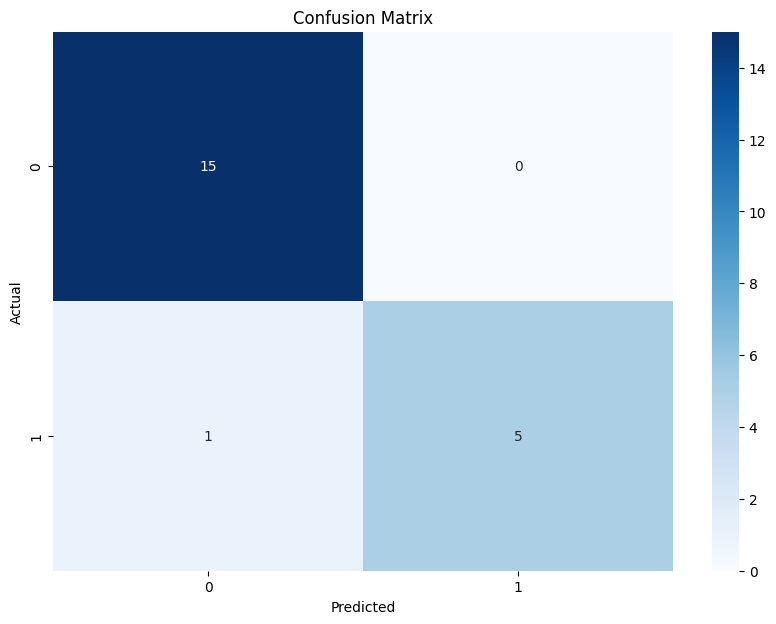

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.83      0.91         6

    accuracy                           0.95        21
   macro avg       0.97      0.92      0.94        21
weighted avg       0.96      0.95      0.95        21



In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

# Assuming df_MentalHealth is already defined and loaded

# Define target and features
target_column = 'Panic attack'
X = df_MentalHealth.drop(columns=[target_column], errors='ignore')
y = df_MentalHealth[target_column].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 25)
# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=25)

# Fine-tuned parameter grid for grid search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5,7],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# List to store accuracy for each fold
accuracies = []

# Convert X and y to numpy arrays if they are not already
X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X
y_np = y

# KFold Cross Validation with GridSearchCV for each fold
fold = 1
for train_index, val_index in kf.split(X_np):
    X_train_kf, X_val_kf = X_np[train_index], X_np[val_index]
    y_train_kf, y_val_kf = y_np[train_index], y_np[val_index]

    # Create RandomForestClassifier object
    rf = RandomForestClassifier(random_state=21)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

    # Perform grid search on the current fold's training data
    grid_search.fit(X_train_kf, y_train_kf)

    # Get the best parameters for the current fold
    best_params = grid_search.best_params_
    print(f"Fold {fold} - Best parameters from GridSearchCV: {best_params}")

    # Create RandomForestClassifier with best parameters
    RF_clf = RandomForestClassifier(**best_params)

    # Train the classifier on the current fold's training data
    RF_clf.fit(X_train_kf, y_train_kf)

    # Predict the response for validation set
    y_pred_kf = RF_clf.predict(X_val_kf)

    # Calculate accuracy
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    accuracies.append(accuracy_kf * 100)

    print(f"Fold {fold} - Accuracy: {accuracy_kf * 100:.2f}%")
    fold += 1

# Calculate mean accuracy over all folds
mean_accuracy = np.mean(accuracies)
print("Average accuracy after KFold cross-validation: {:.2f}%".format(mean_accuracy))

# Final evaluation on the test set using the best hyperparameters found
# Re-fit the model using the entire training data with the best hyperparameters found in the last fold (for simplicity)
RF_clf.fit(X_np, y_np)
y_pred_test = RF_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test) * 100
print("Accuracy on the test set: {:.2f}%".format(test_accuracy))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(class_report)


##**Support Vector Machine**

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df_MentalHealth is already defined and loaded

# Define target and features
target_column = 'Depression'
X = df_MentalHealth.drop(columns=[target_column], errors='ignore')
y = df_MentalHealth[target_column].values.ravel()

total_accuracy = 0.0

for i in range(30):
    # Menggabungkan X dan y untuk pengacakan bersama
    combined = np.hstack((X, y.reshape(-1, 1)))
    np.random.shuffle(combined)

    # Memisahkan kembali X dan y setelah pengacakan
    X_shuffled = combined[:, :-1]
    y_shuffled = combined[:, -1]

    # Split dataset menjadi train dan test dengan random_state tetap
    X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=25)

    # Membuat objek SVM Classifier
    clf = SVC()
    clf.fit(X_train, y_train)

    # Memprediksi respons untuk dataset uji
    y_pred = clf.predict(X_test)

    # Calculate accuracy for this iteration
    accuracy = accuracy_score(y_test, y_pred)

    # Model Accuracy, how often is the classifier correct?
    print("Akurasi pada percobaan ke-{0}: {1}".format(i+1, accuracy))

    # Add accuracy to total
    total_accuracy += accuracy

# Calculate average accuracy
avg_accuracy = total_accuracy / 30
avg_accuracy_percentage = avg_accuracy * 100  # Convert to percentage

print("Rata-rata akurasi Algoritma SVM dari 30 percobaan adalah: {:.2f}%".format(avg_accuracy_percentage))


Akurasi pada percobaan ke-1: 0.7142857142857143
Akurasi pada percobaan ke-2: 0.5714285714285714
Akurasi pada percobaan ke-3: 0.7619047619047619
Akurasi pada percobaan ke-4: 0.6190476190476191
Akurasi pada percobaan ke-5: 0.6666666666666666
Akurasi pada percobaan ke-6: 0.6190476190476191
Akurasi pada percobaan ke-7: 0.47619047619047616
Akurasi pada percobaan ke-8: 0.47619047619047616
Akurasi pada percobaan ke-9: 0.7619047619047619
Akurasi pada percobaan ke-10: 0.6190476190476191
Akurasi pada percobaan ke-11: 0.5238095238095238
Akurasi pada percobaan ke-12: 0.6666666666666666
Akurasi pada percobaan ke-13: 0.6190476190476191
Akurasi pada percobaan ke-14: 0.5714285714285714
Akurasi pada percobaan ke-15: 0.7619047619047619
Akurasi pada percobaan ke-16: 0.7142857142857143
Akurasi pada percobaan ke-17: 0.6666666666666666
Akurasi pada percobaan ke-18: 0.7142857142857143
Akurasi pada percobaan ke-19: 0.6666666666666666
Akurasi pada percobaan ke-20: 0.5714285714285714
Akurasi pada percobaan ke-2

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df_MentalHealth is already defined and loaded

# Define target and features
target_column = 'Anxiety'
X = df_MentalHealth.drop(columns=[target_column], errors='ignore')
y = df_MentalHealth[target_column].values.ravel()

total_accuracy = 0.0

for i in range(30):
    # Menggabungkan X dan y untuk pengacakan bersama
    combined = np.hstack((X, y.reshape(-1, 1)))
    np.random.shuffle(combined)

    # Memisahkan kembali X dan y setelah pengacakan
    X_shuffled = combined[:, :-1]
    y_shuffled = combined[:, -1]

    # Split dataset menjadi train dan test dengan random_state tetap
    X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=25)

    # Membuat objek SVM Classifier
    clf = SVC()
    clf.fit(X_train, y_train)

    # Memprediksi respons untuk dataset uji
    y_pred = clf.predict(X_test)

    # Calculate accuracy for this iteration
    accuracy = accuracy_score(y_test, y_pred)

    # Model Accuracy, how often is the classifier correct?
    print("Akurasi pada percobaan ke-{0}: {1}".format(i+1, accuracy))

    # Add accuracy to total
    total_accuracy += accuracy

# Calculate average accuracy
avg_accuracy = total_accuracy / 30
avg_accuracy_percentage = avg_accuracy * 100  # Convert to percentage

print("Rata-rata akurasi Algoritma SVM dari 30 percobaan adalah: {:.2f}%".format(avg_accuracy_percentage))


Akurasi pada percobaan ke-1: 0.8095238095238095
Akurasi pada percobaan ke-2: 0.6666666666666666
Akurasi pada percobaan ke-3: 0.7619047619047619
Akurasi pada percobaan ke-4: 0.6190476190476191
Akurasi pada percobaan ke-5: 0.8571428571428571
Akurasi pada percobaan ke-6: 0.5714285714285714
Akurasi pada percobaan ke-7: 0.7142857142857143
Akurasi pada percobaan ke-8: 0.6666666666666666
Akurasi pada percobaan ke-9: 0.7142857142857143
Akurasi pada percobaan ke-10: 0.8095238095238095
Akurasi pada percobaan ke-11: 0.7142857142857143
Akurasi pada percobaan ke-12: 0.5714285714285714
Akurasi pada percobaan ke-13: 0.47619047619047616
Akurasi pada percobaan ke-14: 0.5238095238095238
Akurasi pada percobaan ke-15: 0.7619047619047619
Akurasi pada percobaan ke-16: 0.47619047619047616
Akurasi pada percobaan ke-17: 0.6666666666666666
Akurasi pada percobaan ke-18: 0.7142857142857143
Akurasi pada percobaan ke-19: 0.7142857142857143
Akurasi pada percobaan ke-20: 0.7619047619047619
Akurasi pada percobaan ke-2

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df_MentalHealth is already defined and loaded

# Define target and features
target_column = 'Panic attack'
X = df_MentalHealth.drop(columns=[target_column], errors='ignore')
y = df_MentalHealth[target_column].values.ravel()

total_accuracy = 0.0

for i in range(30):
    # Menggabungkan X dan y untuk pengacakan bersama
    combined = np.hstack((X, y.reshape(-1, 1)))
    np.random.shuffle(combined)

    # Memisahkan kembali X dan y setelah pengacakan
    X_shuffled = combined[:, :-1]
    y_shuffled = combined[:, -1]

    # Split dataset menjadi train dan test dengan random_state tetap
    X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=25)

    # Membuat objek SVM Classifier
    clf = SVC()
    clf.fit(X_train, y_train)

    # Memprediksi respons untuk dataset uji
    y_pred = clf.predict(X_test)

    # Calculate accuracy for this iteration
    accuracy = accuracy_score(y_test, y_pred)

    # Model Accuracy, how often is the classifier correct?
    print("Akurasi pada percobaan ke-{0}: {1}".format(i+1, accuracy))

    # Add accuracy to total
    total_accuracy += accuracy

# Calculate average accuracy
avg_accuracy = total_accuracy / 30
avg_accuracy_percentage = avg_accuracy * 100  # Convert to percentage

print("Rata-rata akurasi Algoritma SVM dari 30 percobaan adalah: {:.2f}%".format(avg_accuracy_percentage))


Akurasi pada percobaan ke-1: 0.6190476190476191
Akurasi pada percobaan ke-2: 0.7142857142857143
Akurasi pada percobaan ke-3: 0.5714285714285714
Akurasi pada percobaan ke-4: 0.7142857142857143
Akurasi pada percobaan ke-5: 0.6666666666666666
Akurasi pada percobaan ke-6: 0.5714285714285714
Akurasi pada percobaan ke-7: 0.7142857142857143
Akurasi pada percobaan ke-8: 0.6666666666666666
Akurasi pada percobaan ke-9: 0.7142857142857143
Akurasi pada percobaan ke-10: 0.6190476190476191
Akurasi pada percobaan ke-11: 0.5714285714285714
Akurasi pada percobaan ke-12: 0.9047619047619048
Akurasi pada percobaan ke-13: 0.6666666666666666
Akurasi pada percobaan ke-14: 0.6666666666666666
Akurasi pada percobaan ke-15: 0.6666666666666666
Akurasi pada percobaan ke-16: 0.7142857142857143
Akurasi pada percobaan ke-17: 0.7619047619047619
Akurasi pada percobaan ke-18: 0.8571428571428571
Akurasi pada percobaan ke-19: 0.7142857142857143
Akurasi pada percobaan ke-20: 0.7619047619047619
Akurasi pada percobaan ke-21:

**Tuning & kfold**


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fold 1 - Best parameters from GridSearchCV: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Fold 1 - Accuracy: 0.8095
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fold 2 - Best parameters from GridSearchCV: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Fold 2 - Accuracy: 0.7000
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fold 3 - Best parameters from GridSearchCV: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Fold 3 - Accuracy: 0.7500
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fold 4 - Best parameters from GridSearchCV: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Fold 4 - Accuracy: 0.7500
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fold 5 - Best parameters from GridSearchCV: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Fold 5 - Accuracy: 1.0000
Average accuracy after KFold cross-validation: 0.8019
Accuracy on the test set: 0.8095
Confusion Matrix:
[[11  0]


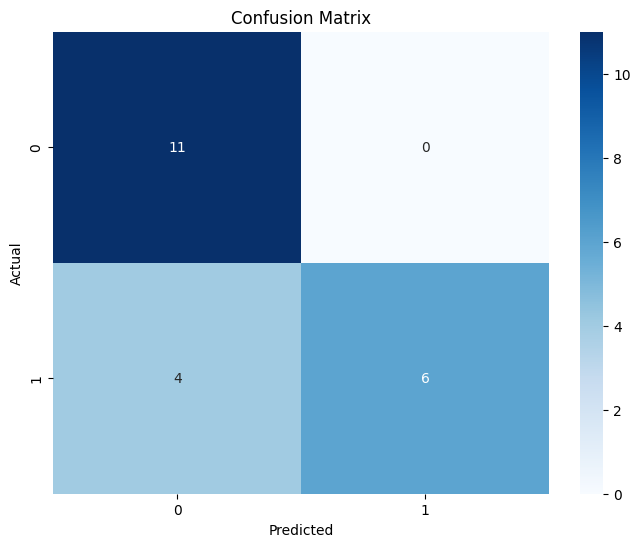

Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.60      0.75        10

    accuracy                           0.81        21
   macro avg       0.87      0.80      0.80        21
weighted avg       0.86      0.81      0.80        21



In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming df_MentalHealth is already defined and loaded

# Define target and features
target_column = 'Depression'
X = df_MentalHealth.drop(columns=[target_column], errors='ignore')
y = df_MentalHealth[target_column].values.ravel()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Initialize KFold with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=25)

# Fine-tuned parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['linear', 'rbf']  # Kernel type
}

# List to store accuracy for each fold
accuracies = []

# Convert X and y to numpy arrays if they are not already
X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X
y_np = y

# Perform KFold Cross Validation with GridSearchCV for each fold
fold = 1
for train_index, val_index in kf.split(X_np):
    X_train_kf, X_val_kf = X_np[train_index], X_np[val_index]
    y_train_kf, y_val_kf = y_np[train_index], y_np[val_index]

    # Scale the data
    scaler = StandardScaler()
    X_train_kf_scaled = scaler.fit_transform(X_train_kf)
    X_val_kf_scaled = scaler.transform(X_val_kf)

    # Initialize SVM classifier
    svm = SVC()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

    # Perform grid search on the current fold's training data
    grid_search.fit(X_train_kf_scaled, y_train_kf)

    # Get the best parameters for the current fold
    best_params = grid_search.best_params_
    print(f"Fold {fold} - Best parameters from GridSearchCV: {best_params}")

    # Create SVM classifier with best parameters
    svm_clf = SVC(**best_params)

    # Train the classifier on the current fold's scaled training data
    svm_clf.fit(X_train_kf_scaled, y_train_kf)

    # Predict the response for validation set
    y_pred_kf = svm_clf.predict(X_val_kf_scaled)

    # Calculate accuracy for this fold
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    accuracies.append(accuracy_kf)

    print(f"Fold {fold} - Accuracy: {accuracy_kf:.4f}")
    fold += 1

# Calculate mean accuracy over all folds
mean_accuracy = np.mean(accuracies)
print("Average accuracy after KFold cross-validation: {:.4f}".format(mean_accuracy))

# Final evaluation on the test set using the best hyperparameters found
# Scale the entire training set
scaler_final = StandardScaler()
X_train_scaled = scaler_final.fit_transform(X_train)
X_test_scaled = scaler_final.transform(X_test)

# Create SVM classifier with best parameters from all folds
svm_final = SVC(**best_params)

# Train the final classifier on the entire scaled training data
svm_final.fit(X_train_scaled, y_train)

# Predict the response for the test set
y_pred_test = svm_final.predict(X_test_scaled)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy on the test set: {:.4f}".format(test_accuracy))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(class_report)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fold 1 - Best parameters from GridSearchCV: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Fold 1 - Accuracy: 0.4286
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fold 2 - Best parameters from GridSearchCV: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Fold 2 - Accuracy: 0.6000
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fold 3 - Best parameters from GridSearchCV: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Fold 3 - Accuracy: 0.7000
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fold 4 - Best parameters from GridSearchCV: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Fold 4 - Accuracy: 0.6500
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fold 5 - Best parameters from GridSearchCV: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Fold 5 - Accuracy: 0.8000
Average accuracy after KFold cross-validation: 0.6357
Accuracy on the test set: 0.5714
Confusion Matrix:
[[12  0]
 

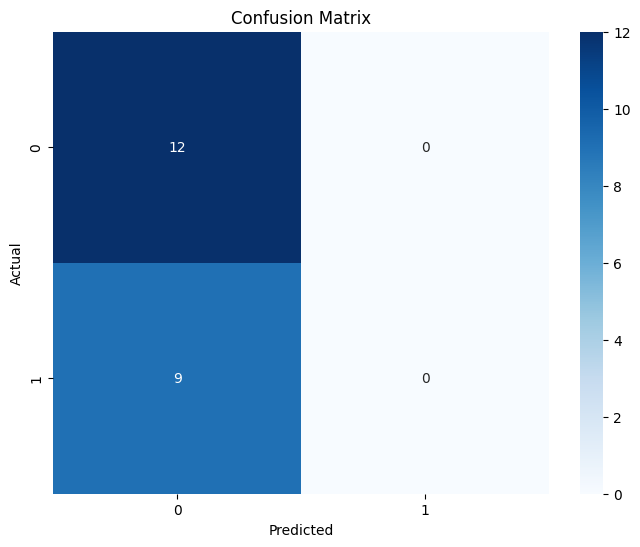

Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73        12
           1       0.00      0.00      0.00         9

    accuracy                           0.57        21
   macro avg       0.29      0.50      0.36        21
weighted avg       0.33      0.57      0.42        21



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming df_MentalHealth is already defined and loaded

# Define target and features
target_column = 'Anxiety'
X = df_MentalHealth.drop(columns=[target_column], errors='ignore')
y = df_MentalHealth[target_column].values.ravel()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Initialize KFold with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=25)

# Fine-tuned parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['linear', 'rbf']  # Kernel type
}

# List to store accuracy for each fold
accuracies = []

# Convert X and y to numpy arrays if they are not already
X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X
y_np = y

# Perform KFold Cross Validation with GridSearchCV for each fold
fold = 1
for train_index, val_index in kf.split(X_np):
    X_train_kf, X_val_kf = X_np[train_index], X_np[val_index]
    y_train_kf, y_val_kf = y_np[train_index], y_np[val_index]

    # Scale the data
    scaler = StandardScaler()
    X_train_kf_scaled = scaler.fit_transform(X_train_kf)
    X_val_kf_scaled = scaler.transform(X_val_kf)

    # Initialize SVM classifier
    svm = SVC()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

    # Perform grid search on the current fold's training data
    grid_search.fit(X_train_kf_scaled, y_train_kf)

    # Get the best parameters for the current fold
    best_params = grid_search.best_params_
    print(f"Fold {fold} - Best parameters from GridSearchCV: {best_params}")

    # Create SVM classifier with best parameters
    svm_clf = SVC(**best_params)

    # Train the classifier on the current fold's scaled training data
    svm_clf.fit(X_train_kf_scaled, y_train_kf)

    # Predict the response for validation set
    y_pred_kf = svm_clf.predict(X_val_kf_scaled)

    # Calculate accuracy for this fold
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    accuracies.append(accuracy_kf)

    print(f"Fold {fold} - Accuracy: {accuracy_kf:.4f}")
    fold += 1

# Calculate mean accuracy over all folds
mean_accuracy = np.mean(accuracies)
print("Average accuracy after KFold cross-validation: {:.4f}".format(mean_accuracy))

# Final evaluation on the test set using the best hyperparameters found
# Scale the entire training set
scaler_final = StandardScaler()
X_train_scaled = scaler_final.fit_transform(X_train)
X_test_scaled = scaler_final.transform(X_test)

# Create SVM classifier with best parameters from all folds
svm_final = SVC(**best_params)

# Train the final classifier on the entire scaled training data
svm_final.fit(X_train_scaled, y_train)

# Predict the response for the test set
y_pred_test = svm_final.predict(X_test_scaled)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy on the test set: {:.4f}".format(test_accuracy))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(class_report)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fold 1 - Best parameters from GridSearchCV: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Fold 1 - Accuracy: 0.7143
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fold 2 - Best parameters from GridSearchCV: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Fold 2 - Accuracy: 0.7500
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fold 3 - Best parameters from GridSearchCV: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Fold 3 - Accuracy: 0.7000
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fold 4 - Best parameters from GridSearchCV: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Fold 4 - Accuracy: 0.6500
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fold 5 - Best parameters from GridSearchCV: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Fold 5 - Accuracy: 0.5500
Average accuracy after KFold cross-validation: 0.6729
Accuracy on the test set: 0.7143
Confusion Matrix:
[[14  1

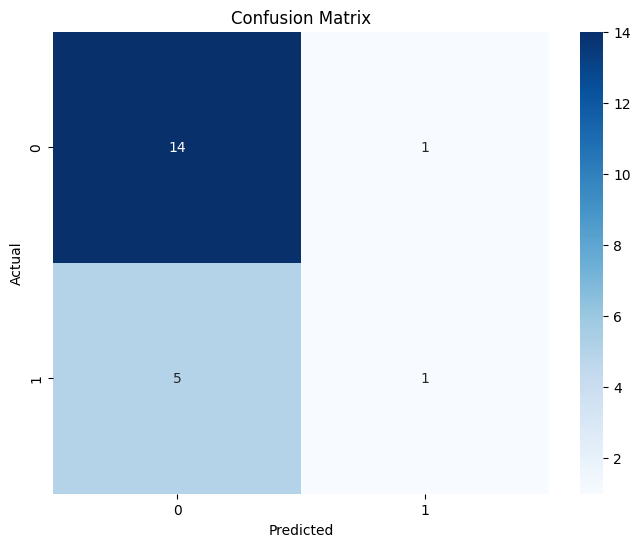

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.93      0.82        15
           1       0.50      0.17      0.25         6

    accuracy                           0.71        21
   macro avg       0.62      0.55      0.54        21
weighted avg       0.67      0.71      0.66        21



In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming df_MentalHealth is already defined and loaded

# Define target and features
target_column = 'Panic attack'
X = df_MentalHealth.drop(columns=[target_column], errors='ignore')
y = df_MentalHealth[target_column].values.ravel()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Initialize KFold with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=25)

# Fine-tuned parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['linear', 'rbf']  # Kernel type
}

# List to store accuracy for each fold
accuracies = []

# Convert X and y to numpy arrays if they are not already
X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X
y_np = y

# Perform KFold Cross Validation with GridSearchCV for each fold
fold = 1
for train_index, val_index in kf.split(X_np):
    X_train_kf, X_val_kf = X_np[train_index], X_np[val_index]
    y_train_kf, y_val_kf = y_np[train_index], y_np[val_index]

    # Scale the data
    scaler = StandardScaler()
    X_train_kf_scaled = scaler.fit_transform(X_train_kf)
    X_val_kf_scaled = scaler.transform(X_val_kf)

    # Initialize SVM classifier
    svm = SVC()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

    # Perform grid search on the current fold's training data
    grid_search.fit(X_train_kf_scaled, y_train_kf)

    # Get the best parameters for the current fold
    best_params = grid_search.best_params_
    print(f"Fold {fold} - Best parameters from GridSearchCV: {best_params}")

    # Create SVM classifier with best parameters
    svm_clf = SVC(**best_params)

    # Train the classifier on the current fold's scaled training data
    svm_clf.fit(X_train_kf_scaled, y_train_kf)

    # Predict the response for validation set
    y_pred_kf = svm_clf.predict(X_val_kf_scaled)

    # Calculate accuracy for this fold
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    accuracies.append(accuracy_kf)

    print(f"Fold {fold} - Accuracy: {accuracy_kf:.4f}")
    fold += 1

# Calculate mean accuracy over all folds
mean_accuracy = np.mean(accuracies)
print("Average accuracy after KFold cross-validation: {:.4f}".format(mean_accuracy))

# Final evaluation on the test set using the best hyperparameters found
# Scale the entire training set
scaler_final = StandardScaler()
X_train_scaled = scaler_final.fit_transform(X_train)
X_test_scaled = scaler_final.transform(X_test)

# Create SVM classifier with best parameters from all folds
svm_final = SVC(**best_params)

# Train the final classifier on the entire scaled training data
svm_final.fit(X_train_scaled, y_train)

# Predict the response for the test set
y_pred_test = svm_final.predict(X_test_scaled)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy on the test set: {:.4f}".format(test_accuracy))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(class_report)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fold 1 - Best parameters from GridSearchCV: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Fold 1 - Accuracy: 0.7143
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fold 2 - Best parameters from GridSearchCV: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Fold 2 - Accuracy: 0.7500
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fold 3 - Best parameters from GridSearchCV: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Fold 3 - Accuracy: 0.7000
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fold 4 - Best parameters from GridSearchCV: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Fold 4 - Accuracy: 0.6500
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fold 5 - Best parameters from GridSearchCV: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Fold 5 - Accuracy: 0.5500
Average accuracy after KFold cross-validation: 0.6729
Accuracy on the test set: 0.7143
Confusion Matrix:
[[14  1

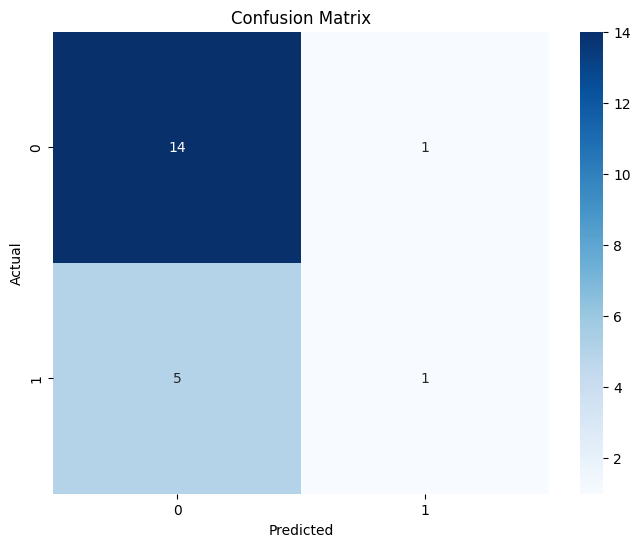

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.93      0.82        15
           1       0.50      0.17      0.25         6

    accuracy                           0.71        21
   macro avg       0.62      0.55      0.54        21
weighted avg       0.67      0.71      0.66        21



In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming df_MentalHealth is already defined and loaded

# Define target and features
target_column = 'Panic attack'
X = df_MentalHealth.drop(columns=[target_column], errors='ignore')
y = df_MentalHealth[target_column].values.ravel()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Initialize KFold with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=25)

# Fine-tuned parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['linear', 'rbf']  # Kernel type
}

# List to store accuracy for each fold
accuracies = []

# Convert X and y to numpy arrays if they are not already
X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X
y_np = y

# Perform KFold Cross Validation with GridSearchCV for each fold
fold = 1
for train_index, val_index in kf.split(X_np):
    X_train_kf, X_val_kf = X_np[train_index], X_np[val_index]
    y_train_kf, y_val_kf = y_np[train_index], y_np[val_index]

    # Scale the data
    scaler = StandardScaler()
    X_train_kf_scaled = scaler.fit_transform(X_train_kf)
    X_val_kf_scaled = scaler.transform(X_val_kf)

    # Initialize SVM classifier
    svm = SVC()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

    # Perform grid search on the current fold's training data
    grid_search.fit(X_train_kf_scaled, y_train_kf)

    # Get the best parameters for the current fold
    best_params = grid_search.best_params_
    print(f"Fold {fold} - Best parameters from GridSearchCV: {best_params}")

    # Create SVM classifier with best parameters
    svm_clf = SVC(**best_params)

    # Train the classifier on the current fold's scaled training data
    svm_clf.fit(X_train_kf_scaled, y_train_kf)

    # Predict the response for validation set
    y_pred_kf = svm_clf.predict(X_val_kf_scaled)

    # Calculate accuracy for this fold
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    accuracies.append(accuracy_kf)

    print(f"Fold {fold} - Accuracy: {accuracy_kf:.4f}")
    fold += 1

# Calculate mean accuracy over all folds
mean_accuracy = np.mean(accuracies)
print("Average accuracy after KFold cross-validation: {:.4f}".format(mean_accuracy))

# Final evaluation on the test set using the best hyperparameters found
# Scale the entire training set
scaler_final = StandardScaler()
X_train_scaled = scaler_final.fit_transform(X_train)
X_test_scaled = scaler_final.transform(X_test)

# Create SVM classifier with best parameters from all folds
svm_final = SVC(**best_params)

# Train the final classifier on the entire scaled training data
svm_final.fit(X_train_scaled, y_train)

# Predict the response for the test set
y_pred_test = svm_final.predict(X_test_scaled)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy on the test set: {:.4f}".format(test_accuracy))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(class_report)


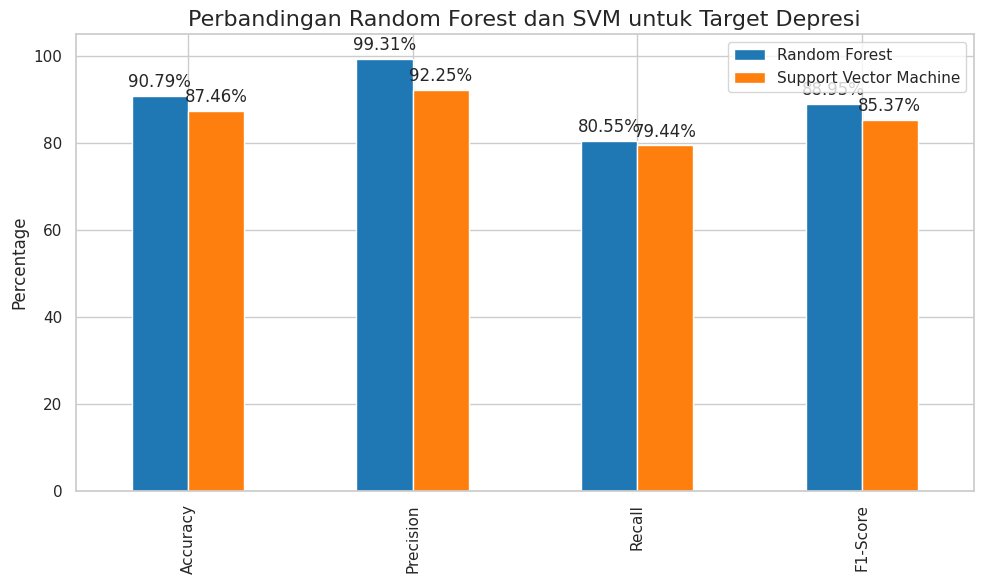

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the given data
data = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Random Forest': [],  # Example values, replace with actual values
    'Support Vector Machine': [87.46, 92.25, 79.44, 85.37]  # Example values, replace with actual values
}

df = pd.DataFrame(data)

# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='bar', x='Metrics', ax=ax, color=['#1f77b4', '#ff7f0e'])

# Set plot title and labels
ax.set_title('Perbandingan Random Forest dan SVM untuk Target Depresi', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('Percentage', fontsize=12)
ax.set_ylim(0, 105)  # Adjust y-axis limit to match the provided plot

# Annotate each bar with the corresponding values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')

# Add legend and adjust layout
plt.legend(title='', loc='upper right', labels=['Random Forest', 'Support Vector Machine'])
plt.tight_layout()

# Show the plot
plt.show()
